## Circles data 

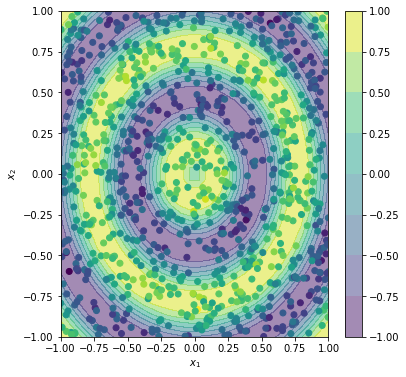

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def circles(X):
    y = np.sin(10*np.sqrt(X[:,0] ** 2 + X[:,1] ** 2))
    return y

def generate_data(y_func,N=1000):
    X = 2*np.random.rand(N,2)-1
    y = y_func(X) + 0.25* np.random.randn(N)
    return X,y

def draw_contours(y_func):
    plt.figure(figsize=(6,6))
    X1,X2 = np.meshgrid(np.linspace(-1, 1, 30),np.linspace(-1, 1, 30))
    Y = y_func(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1,X2,Y,alpha=0.5)
    c = plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    return None

X,y = generate_data(circles)
f = draw_contours(circles)
s = plt.scatter(X[:,0],X[:,1],c=y) 

## Predictions using Keras

29/29 [==============================] - 0s 859us/step


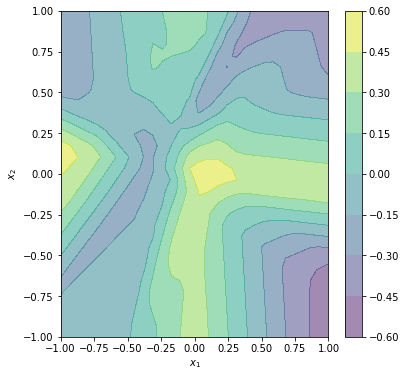

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=256, batch_size=64,verbose=False)

f = draw_contours(model.predict)

## Computing predictions from scratch

### Initializing a neural network 

moi:
- Initialize the weigths but don't equal them to 0 because you will get results of 0. instead randomize

In [3]:
def initialize_network(layers):
    np.random.seed(108)
    pars = [] # store parameters in a list of dictionaries
    for j in range(1,len(layers)): # loop over layers
        dictionary = {'weight' : np.random.randn(layers[j],layers[j-1]), # weights
                      'bias' : np.random.randn(layers[j],1)} # biases
        pars.append(dictionary)
    return pars

p = X.shape[1] # set number of features
layers = [p,16,16,1] # set number of units in each layer
pars = initialize_network(layers)

### Forward pass

note the line where `H = Z if j+1 == len(pars) else Z*(Z>0) # if last layer H=Z else apply relu function`

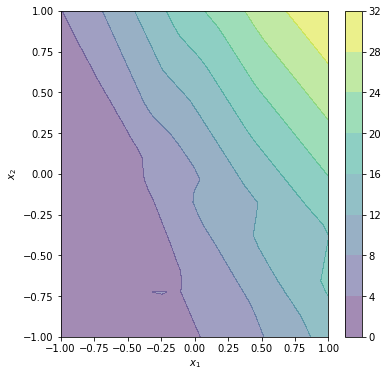

In [4]:
def forward(X,pars):
    
    # make lists to store elements of the graph in memory
    Zs,Hs = [],[]
    
    # initialize inputs
    H = X.T
    
    # loop over layers
    for j in range(len(pars)):
        
        # get parameters for this layer      
        W = pars[j]['weight']
        b = pars[j]['bias']
                
        # activations and output
        Z = np.dot(W,H)+b # TODO
        H = Z if j+1 == len(pars) else Z*(Z>0) # if last layer H=Z else apply relu function
         
        # save to list
        Zs.append(Z)
        Hs.append(H)
    
    return Zs,Hs

def predict(X,pars):
    Zs,Hs = forward(X,pars)
    return Hs[-1].flatten()

# test plot using random intialization
f = draw_contours(lambda X: predict(X,pars))

### Backward pass

In [11]:
def backprop(Zs,Hs,X,y,pars,lamda=0):
    
    # setup list for gradients
    grads = []
    
    # data size
    m = X.shape[0]

    # loop over layers
    for j in range(len(pars))[::-1]:
        Z = Zs[j]
        H = Hs[j]
        W = pars[j]['weight']
                
        # get activations gradient
        dZ = (H - y) if j+1 == len(pars) else (Z > 0) * dH
        
        # get input from previous layer
        H_back = Hs[j-1] if j>0 else X.T
                
        # get parameter gradients
        dW = np.matmul(dZ, H_back.T) / m + (lamda/m) * W
        db = np.sum(dZ,axis=1,keepdims=True) / m
        
        # save to list
        grads.append({'weight' : dW, 'bias' : db})
        
        # move to next layer
        if j>0: dH = np.matmul(W.T,dZ)
                     
    return grads[::-1]

### Vanilla gradient descent

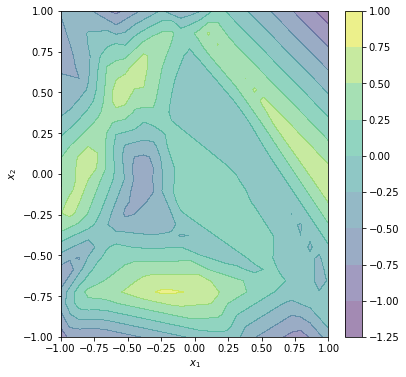

In [12]:
np.random.seed(108)
pars = initialize_network([p,16,16,1])
learning_rate = 1e-2
n_steps = 10000
for i in range(0,n_steps):
    
    # forward and backward pass
    Zs, Hs = forward(X,pars)
    grads = backprop(Zs,Hs,X,y,pars)

    # parameter updates
    for j in range(len(pars)):
        pars[j]['weight'] -= learning_rate * grads[j]['weight']
        pars[j]['bias'] -= learning_rate * grads[j]['bias'] 
        
# plot using optimized parameters 
f = draw_contours(lambda X: predict(X,pars))

### SGD + Adam: TODO (advanced)

In [9]:
grads


[{'weight': None,
  'bias': array([[  0.        ],
         [ -8.30038587],
         [  0.        ],
         [  1.34397378],
         [ -6.12649692],
         [ 17.08693065],
         [ -0.32036128],
         [ -6.70409427],
         [  3.87834449],
         [ 56.63718191],
         [ 10.47598927],
         [  0.        ],
         [-21.6182663 ],
         [-15.30711296],
         [ 16.54404745],
         [ 13.89794302]])},
 {'weight': None,
  'bias': array([[  0.71301516],
         [  3.49509206],
         [  2.32542345],
         [  5.14093999],
         [  0.67372732],
         [ -6.02635144],
         [ -2.71589923],
         [  5.96844988],
         [  0.        ],
         [ -2.10882486],
         [-11.90629018],
         [ -6.08999146],
         [  0.72911735],
         [ 17.30409001],
         [  0.22688475],
         [ 18.35247892]])},
 {'weight': None, 'bias': array([[10.45816925]])}]